In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Task-1: Data Preparation

# 1.Load the dataset into a pandas data frame.use only the sales attribute for this challange.

In [27]:
df=pd.read_csv("DS3_C1_S3_SuperstoreSales_Data_Challenge.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21-01-2014,23-01-2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [28]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# 2.Convert the data into the proper time series data format.


In [29]:
df=pd.read_csv("DS3_C1_S3_SuperstoreSales_Data_Challenge.csv",index_col='Order Date',parse_dates=['Order Date'])
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-08-11,1,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-08-11,2,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-12-06,3,CA-2016-138688,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-11-10,4,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-11-10,5,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-21,9990,CA-2014-110422,23-01-2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2017-02-26,9991,CA-2017-121258,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
2017-02-26,9992,CA-2017-121258,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


# 3.Sort the data with respect to date if required.

In [30]:
df[['Sales']].sort_values(by='Order Date',ascending=False)

,Sales
Order Date,
2017-12-30,323.136
2017-12-30,90.930
2017-12-30,52.776
2017-12-30,209.300
2017-12-30,20.720
...,...
2014-01-03,5.940
2014-01-03,376.509
2014-01-03,137.352


# 4.Resample the date by month.

In [31]:
resample=df.resample('M').mean()

In [32]:
resample=pd.DataFrame(resample)
resample.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-31,4390.572519,53071.091603,221.020656,3.877863,0.136641,34.728661
2014-02-28,5666.325581,54521.313953,148.175674,3.709302,0.174419,30.866941
2014-03-31,5306.113095,52105.827381,326.201821,3.636905,0.186310,0.551780
2014-04-30,4372.256198,55723.347107,204.215008,3.884298,0.115702,38.025383
2014-05-31,5130.331081,48581.885135,200.269149,3.722973,0.142905,26.434121


# 5.Remove missing values if they exist.

In [33]:
df.isnull().sum()

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# 6.Observe if there are any outliers in the data.

<AxesSubplot:xlabel='Sales'>

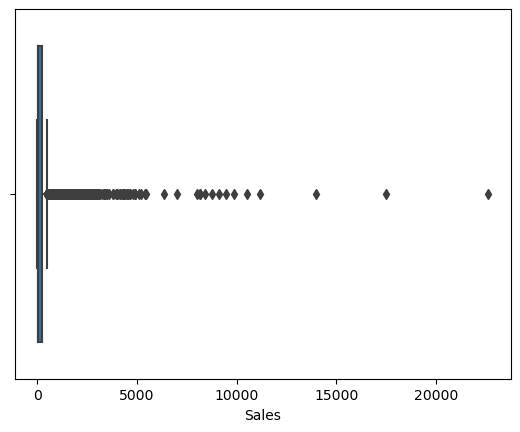

In [34]:
sb.boxplot(df['Sales'])

In [35]:
a=df['Sales']
q1=a.quantile(0.25)
q3=a.quantile(0.75)
iqr=q3-q1
lf=q1-1.5*iqr
uf=q3+1.5*iqr
print('q1={}, q3={}, iqr={}, lf={}, uf={}' .format(q1,q3,iqr,lf,uf))

q1=17.28, q3=209.94, iqr=192.66, lf=-271.71000000000004, uf=498.93


In [36]:
outliers=[]
for i in a:
    if i<lf:
        outliers.append(i)
    if i>uf:
        outliers.append(i)
len(outliers)

1167

In [37]:
df['Sales']=df['Sales'].replace(to_replace=outliers,value=df['Sales'].mean())
df['Sales']

Order Date
2016-08-11    261.960000
2016-08-11    229.858001
2016-12-06     14.620000
2015-11-10    229.858001
2015-11-10     22.368000
                 ...    
2014-01-21     25.248000
2017-02-26     91.960000
2017-02-26    258.576000
2017-02-26     29.600000
2017-04-05    243.160000
Name: Sales, Length: 9994, dtype: float64

<AxesSubplot:xlabel='Sales'>

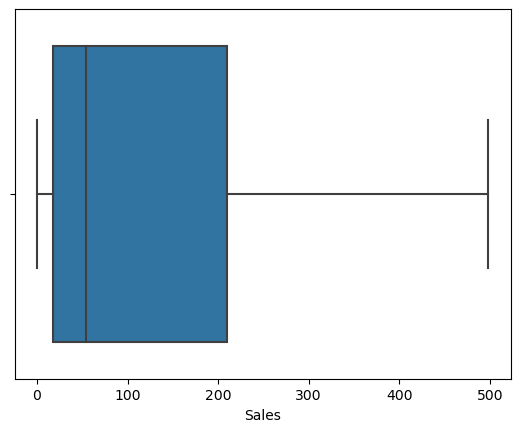

In [38]:
sb.boxplot(df['Sales'])

# 7.Observe the data through data decompostion and note your observation about each components of data.

In [40]:
Sales=resample[['Sales']]
Sales

,Sales
Order Date,
2014-01-31,221.020656
2014-02-28,148.175674
2014-03-31,326.201821
2014-04-30,204.215008
2014-05-31,200.269149
2014-06-30,213.773946
2014-07-31,226.546449
2014-08-31,252.363650
2014-09-30,276.611815


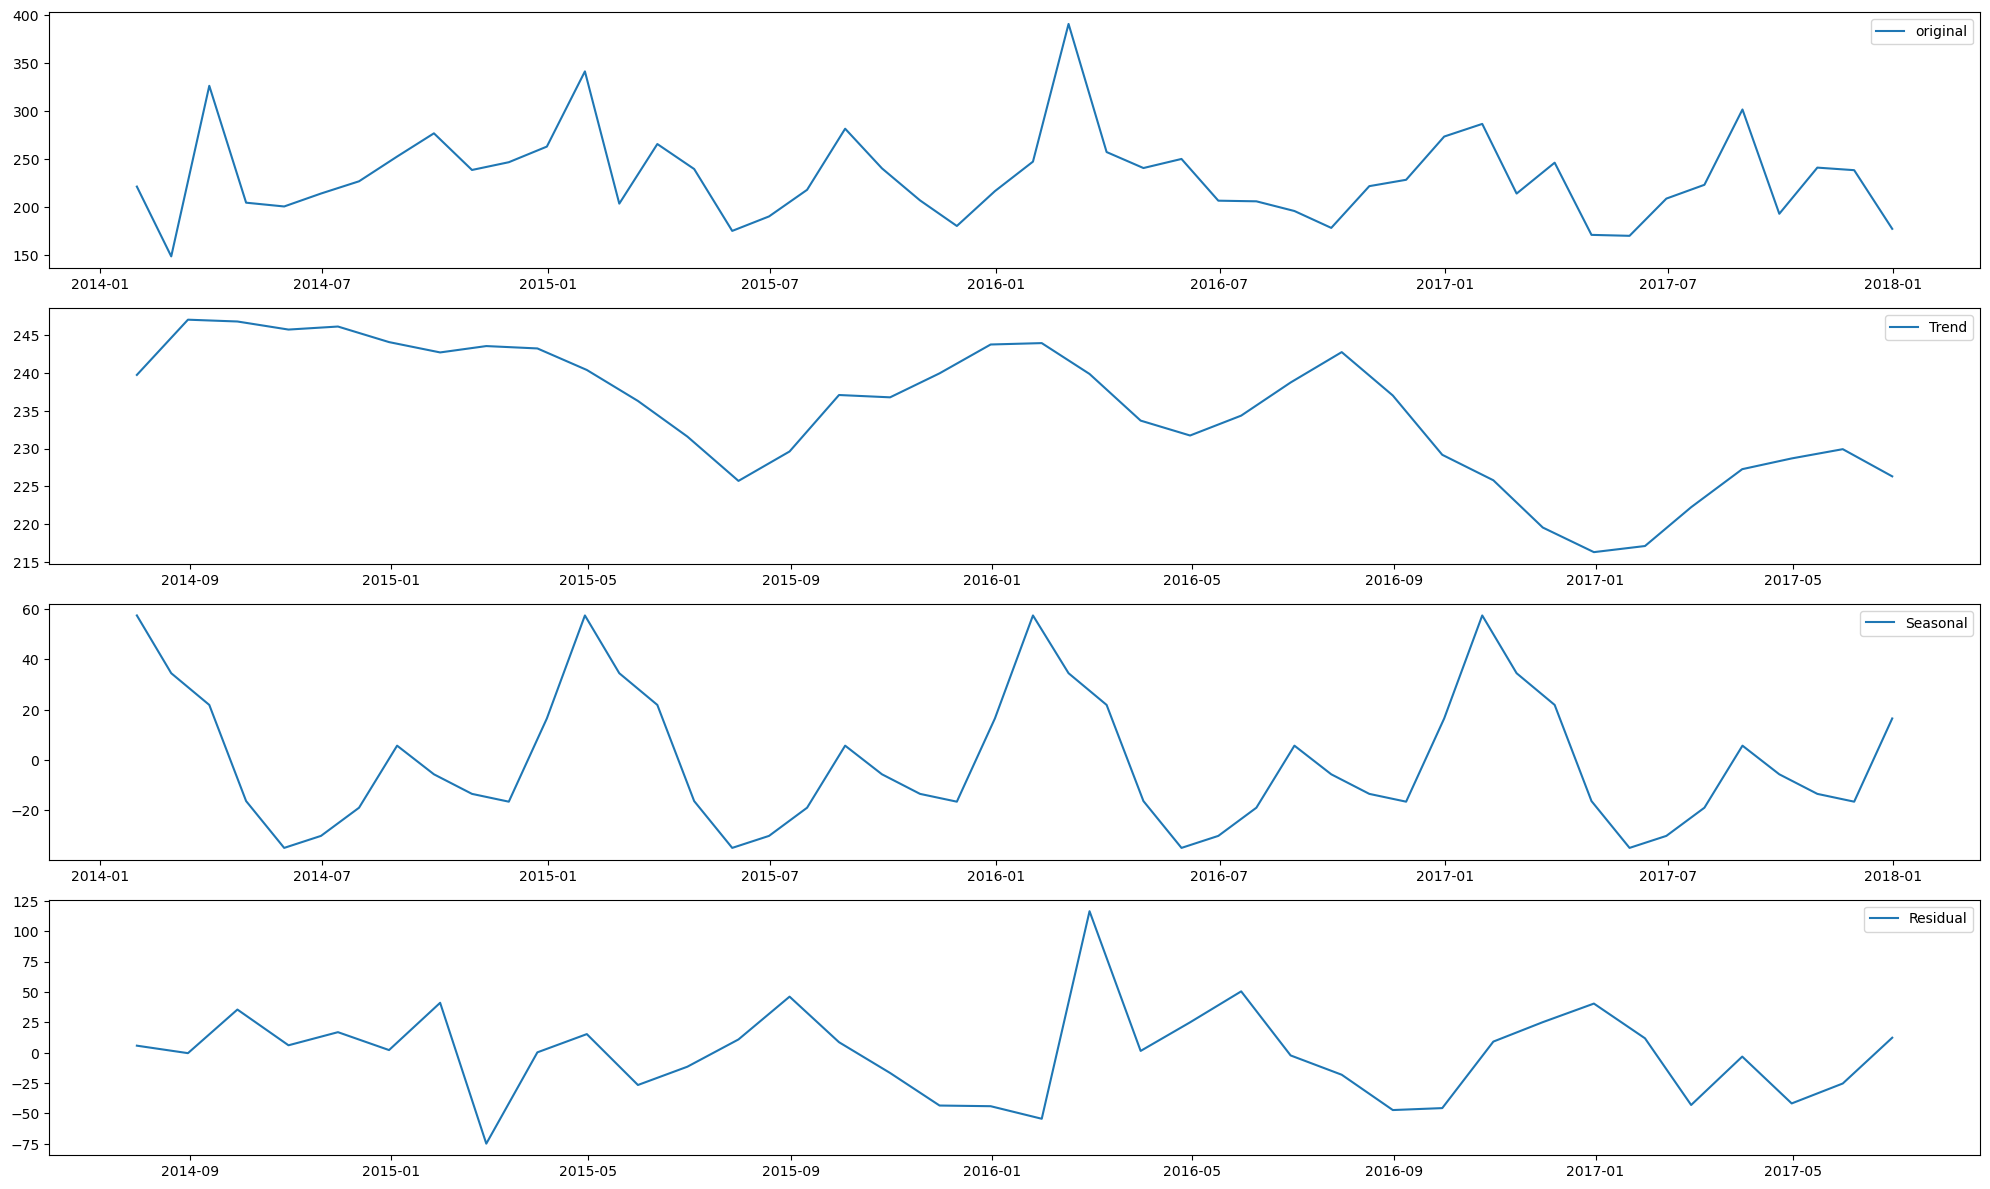

In [42]:
#different time series components
decomposition=seasonal_decompose(Sales, period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# different components of the Time series data
# period = 12 since the data is monthly
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411) #4rows 1col 1st position
plt.plot(Sales,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In the above figure we can see the original series with different time series component. We can trend component in which there is a upward and downward trend. Seasonal component shows the seasonal pattern in the graph. Residual shows the irregular component.

# Task-2: Stationrity

# 1.Check if the time series is stationary and use the Augmented Dickey-Fuller test for Stationarity testing

In [43]:
data=resample['Sales']
data

Order Date
2014-01-31    221.020656
2014-02-28    148.175674
2014-03-31    326.201821
2014-04-30    204.215008
2014-05-31    200.269149
2014-06-30    213.773946
2014-07-31    226.546449
2014-08-31    252.363650
2014-09-30    276.611815
2014-10-31    238.358255
2014-11-30    246.454823
2014-12-31    262.756284
2015-01-31    341.248679
2015-02-28    203.219137
2015-03-31    265.432540
2015-04-30    239.352003
2015-05-31    174.766749
2015-06-30    189.882883
2015-07-31    217.654364
2015-08-31    281.429933
2015-09-30    240.033558
2015-10-31    206.613387
2015-11-30    179.901805
2015-12-31    216.257738
2016-01-31    247.066130
2016-02-29    390.781032
2016-03-31    257.057228
2016-04-30    240.384457
2016-05-31    249.862776
2016-06-30    206.306577
2016-07-31    205.641322
2016-08-31    195.527377
2016-09-30    177.903145
2016-10-31    221.475212
2016-11-30    228.114625
2016-12-31    273.236537
2017-01-31    286.435004
2017-02-28    213.724314
2017-03-31    245.967381
2017-04-30    

In [44]:
def checkStationarity(data):
    pvalue=adfuller(data)[1]
    if(pvalue>0.05):
        msg='p-value ={}, Data is not stationary'.format(pvalue)
    else:
        msg='p-value ={}, Data is stationary'.format(pvalue)
    return(msg)


In [45]:
checkStationarity(data)

'p-value =1.4097136094620738e-07, Data is stationary'

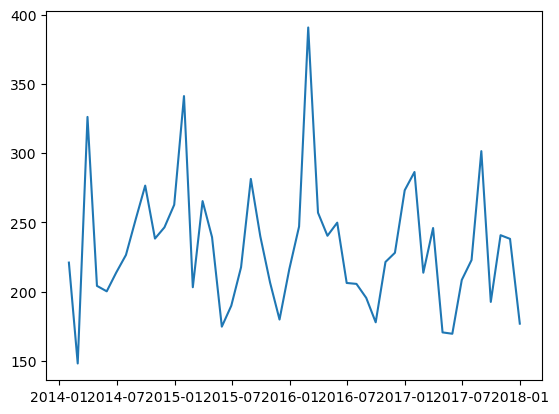

In [68]:
plt.plot(data);

# Task-3: Time series Models

# 1.Use ACF and PACF to decide the order of the model with 20 lags.Note p and q values.

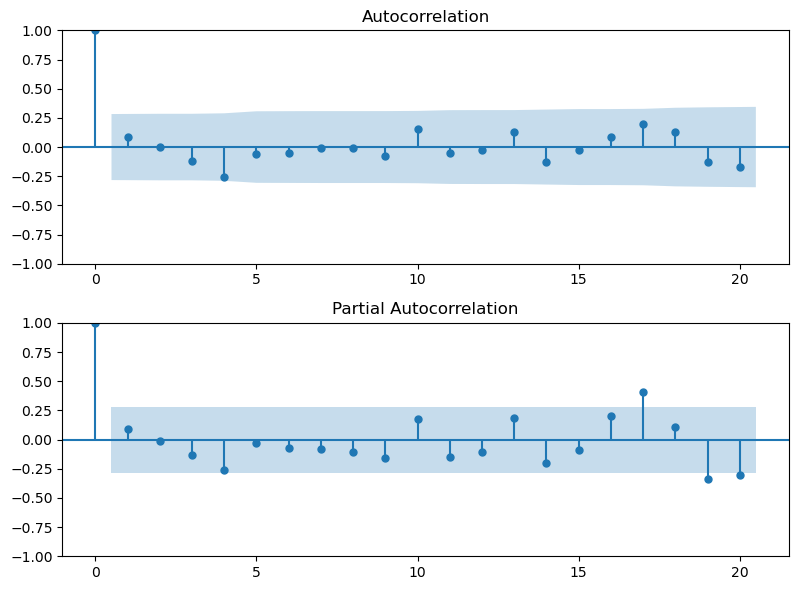

In [46]:
import statsmodels.api as sm
fig = plt.figure(figsize = (8,6))

# Show ACF
ax1 = fig.add_subplot(211)

sm.graphics.tsa.plot_acf(data, lags=20, ax = ax1)

# Show PACF

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(data, lags=20, ax = ax2)

plt.tight_layout()

The lag values in acf=0 and The lag values in pacf=3

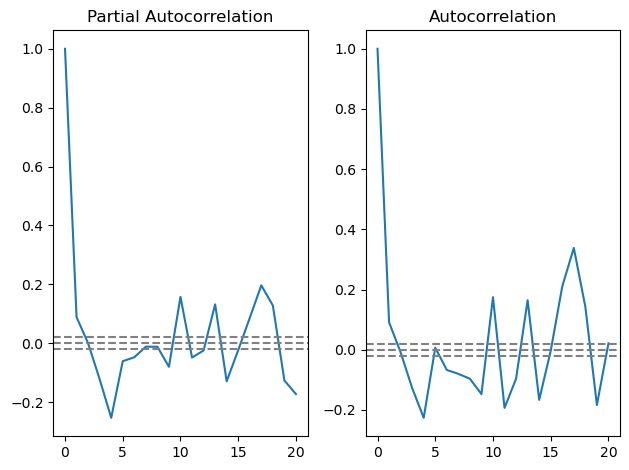

In [47]:
#method=2

lag_acf=acf(data,nlags=20)
lag_pacf=pacf(data,nlags=20,method='ols') #ols=ordinary least seriies , nlags=40(bt default)


# plot ACF (q)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/ np.sqrt(len(df)), linestyle = "--", color = "gray")#CI (95%)
plt.axhline(y = 1.96/ np.sqrt(len(df)), linestyle = "--", color = "gray")
plt.title("Partial Autocorrelation")


# plot PACF (p)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/ np.sqrt(len(df)), linestyle = "--", color = "gray")#CI (95%) alpha = 0.05
plt.axhline(y = 1.96/ np.sqrt(len(df)), linestyle = "--", color = "gray")
plt.title("Autocorrelation")

plt.tight_layout()

# 2.Prepare AR models(s) after stationarity has been achieved.Find out the best AR model by comparing different lag values.

#AR(Auto Regression) Model

In [48]:
ar_m1=ARIMA(data,order=(4,0,0)).fit()
ar_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -250.001
Date:                Sat, 09 Sep 2023   AIC                            512.003
Time:                        20:40:58   BIC                            523.230
Sample:                    01-31-2014   HQIC                           516.245
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        232.4127      6.386     36.396      0.000     219.897     244.928
ar.L1          0.0483      0.155      0.311      0.756      -0.256       0.353
ar.L2          0.0077      0.243      0.032      0.975      -0.469       0.484
ar.L3         -0.0834      0.175     -0.477      0.633      -0.426       0.259
ar.L4         -0.2643      0.182     -1.454      0.146      -0.621       0.092
sigma2      1942.9867    380.593      5.105      0.000    1197.038    2688.936
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                16.39
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             1.11
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
ar_m2=ARIMA(data,order=(5,0,0)).fit()
ar_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -249.999
Date:                Sat, 09 Sep 2023   AIC                            513.997
Time:                        20:41:06   BIC                            527.096
Sample:                    01-31-2014   HQIC                           518.947
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        232.3995      6.444     36.063      0.000     219.769     245.030
ar.L1          0.0507      0.175      0.290      0.772      -0.292       0.394
ar.L2          0.0099      0.245      0.041      0.968      -0.470       0.490
ar.L3         -0.0836      0.175     -0.478      0.633      -0.426       0.259
ar.L4         -0.2667      0.194     -1.374      0.169      -0.647       0.114
ar.L5          0.0120      0.253      0.047      0.962      -0.484       0.508
sigma2      1942.6418    402.941      4.821      0.000    1152.891    2732.392
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                16.13
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             1.11
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
ar_m2=ARIMA(data,order=(6,0,0)).fit()
ar_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(6, 0, 0)   Log Likelihood                -249.884
Date:                Sat, 09 Sep 2023   AIC                            515.767
Time:                        20:41:09   BIC                            530.737
Sample:                    01-31-2014   HQIC                           521.424
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        232.4472      6.149     37.801      0.000     220.395     244.500
ar.L1          0.0508      0.184      0.276      0.783      -0.310       0.412
ar.L2         -0.0068      0.238     -0.029      0.977      -0.474       0.460
ar.L3         -0.0961      0.188     -0.511      0.609      -0.464       0.272
ar.L4         -0.2673      0.202     -1.326      0.185      -0.662       0.128
ar.L5          0.0286      0.266      0.108      0.914      -0.493       0.550
ar.L6         -0.0774      0.243     -0.319      0.750      -0.553       0.399
sigma2      1932.7843    418.033      4.624      0.000    1113.455    2752.114
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.56
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                             1.15
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretion

AIC score of AR(1) model is 512.003

AIC score of AR(2) model is 513.997

AIC score of AR(3) model is 515.767

Lesser the AIC score is better the model. Hence AR(1) is the better model



# 2.Prepare MA models(s) after stationarity has been achieved.Find out the best MA model by comparing different lag values.

In [51]:
ma_m1=ARIMA(data,order=(0,0,4)).fit()
ma_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -249.160
Date:                Sat, 09 Sep 2023   AIC                            510.321
Time:                        20:41:15   BIC                            521.548
Sample:                    01-31-2014   HQIC                           514.564
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        234.0528      2.546     91.919      0.000     229.062     239.043
ma.L1         -0.0312      0.294     -0.106      0.915      -0.607       0.545
ma.L2          0.1891      0.835      0.226      0.821      -1.448       1.826
ma.L3         -0.3160      0.376     -0.840      0.401      -1.054       0.422
ma.L4         -0.7597      0.736     -1.032      0.302      -2.203       0.683
sigma2      1657.8134   1434.584      1.156      0.248   -1153.920    4469.547
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.98   Prob(JB):                         0.59
Heteroskedasticity (H):               0.52   Skew:                             0.33
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
ma_m2=ARIMA(data,order=(0,0,5)).fit()
ma_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 0, 5)   Log Likelihood                -249.122
Date:                Sat, 09 Sep 2023   AIC                            512.243
Time:                        20:41:16   BIC                            525.342
Sample:                    01-31-2014   HQIC                           517.193
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        233.6940      3.653     63.970      0.000     226.534     240.854
ma.L1         -0.0186      0.199     -0.093      0.926      -0.409       0.372
ma.L2          0.2363      0.429      0.551      0.582      -0.604       1.077
ma.L3         -0.2241      0.208     -1.076      0.282      -0.632       0.184
ma.L4         -0.6823      0.401     -1.700      0.089      -1.469       0.104
ma.L5          0.0829      0.166      0.501      0.616      -0.241       0.407
sigma2      1695.2912    821.731      2.063      0.039      84.728    3305.854
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.96   Prob(JB):                         0.54
Heteroskedasticity (H):               0.50   Skew:                             0.38
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
ma_m3=ARIMA(data,order=(0,0,6)).fit()
ma_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 0, 6)   Log Likelihood                -248.383
Date:                Sat, 09 Sep 2023   AIC                            512.767
Time:                        20:41:17   BIC                            527.736
Sample:                    01-31-2014   HQIC                           518.424
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        233.2745      4.648     50.188      0.000     224.164     242.384
ma.L1          0.0542      0.354      0.153      0.878      -0.639       0.747
ma.L2          0.1682      3.631      0.046      0.963      -6.949       7.285
ma.L3         -0.2511      0.675     -0.372      0.710      -1.574       1.072
ma.L4         -0.6124      3.014     -0.203      0.839      -6.520       5.295
ma.L5          0.0135      0.152      0.089      0.929      -0.284       0.311
ma.L6          0.1994      0.869      0.230      0.818      -1.503       1.902
sigma2      1644.3368   6057.640      0.271      0.786   -1.02e+04    1.35e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.87   Prob(JB):                         0.34
Heteroskedasticity (H):               0.52   Skew:                             0.51
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretion

AIC score of AR(1) model is 510.321

AIC score of AR(2) model is 512.243

AIC score of AR(3) model is 512.767

Lesser the AIC score is better the model. Hence AR(1) is the better model

# 4.Preapre ARMA model(s).Find out the best MA model by comparing different lag values.

In [54]:
#Train and test spiltting method
aa=int(0.7*len(data))
train=data.iloc[:aa]
test=data.iloc[aa:]
print('train={}, test={}'.format(len(train),len(test)))

train=33, test=15


# Bulid the ARMA model

In [55]:
p=1;q=1
m1=ARIMA(train,order=(1,0,1))
r1=m1.fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -175.068
Date:                Sat, 09 Sep 2023   AIC                            358.136
Time:                        20:41:22   BIC                            364.122
Sample:                    01-31-2014   HQIC                           360.150
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        234.5957     11.926     19.671      0.000     211.222     257.970
ar.L1         -0.0086      3.780     -0.002      0.998      -7.417       7.400
ma.L1          0.0936      3.781      0.025      0.980      -7.316       7.504
sigma2      2373.3786    552.379      4.297      0.000    1290.735    3456.022
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.64
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                             1.21
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
p=2;q=2
m1=ARIMA(train,order=(2,0,2))
r1=m1.fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -170.426
Date:                Sat, 09 Sep 2023   AIC                            352.851
Time:                        20:41:23   BIC                            361.830
Sample:                    01-31-2014   HQIC                           355.872
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        238.8063      1.378    173.297      0.000     236.105     241.507
ar.L1          1.6035      0.166      9.647      0.000       1.278       1.929
ar.L2         -0.7825      0.135     -5.793      0.000      -1.047      -0.518
ma.L1         -1.9911    140.629     -0.014      0.989    -277.619     273.637
ma.L2          0.9994    141.127      0.007      0.994    -275.604     277.603
sigma2      1446.6112   2.04e+05      0.007      0.994   -3.99e+05    4.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.11
Prob(Q):                              0.88   Prob(JB):                         0.13
Heteroskedasticity (H):               1.14   Skew:                             0.84
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
p=3;q=2
m1=ARIMA(train,order=(3,0,2))
r1=m1.fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -170.412
Date:                Sat, 09 Sep 2023   AIC                            354.823
Time:                        20:41:24   BIC                            365.299
Sample:                    01-31-2014   HQIC                           358.348
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        238.7991      1.378    173.300      0.000     236.098     241.500
ar.L1          1.5776      0.336      4.700      0.000       0.920       2.236
ar.L2         -0.7327      0.478     -1.534      0.125      -1.669       0.204
ar.L3         -0.0312      0.283     -0.110      0.912      -0.586       0.524
ma.L1         -1.9901     47.958     -0.041      0.967     -95.986      92.005
ma.L2          0.9982     48.056      0.021      0.983     -93.189      95.185
sigma2      1440.0254   6.94e+04      0.021      0.983   -1.35e+05    1.37e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.04
Prob(Q):                              0.97   Prob(JB):                         0.13
Heteroskedasticity (H):               1.17   Skew:                             0.83
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretation

AIC score of MA(1) model is 358.136

AIC score of MA(2) model is 352.851

AIC score of MA(3) model is 354.823

Lesser the AIC score is better the model. Hence ARMA(2,2) is the better model.

# Task-4:Forecasting Sales

# 1.Predict a test set and visualize forecast and ground truth.

In [58]:
prediction=r1.predict(0,len(test)-1)
prediction

Order Date
2014-01-31    238.799052
2014-02-28    237.738894
2014-03-31    233.779410
2014-04-30    248.080232
2014-05-31    247.402494
2014-06-30    247.040194
2014-07-31    251.581422
2014-08-31    257.802289
2014-09-30    261.894825
2014-10-31    260.267801
2014-11-30    258.101124
2014-12-31    253.896260
2015-01-31    246.602288
2015-02-28    221.967170
2015-03-31    215.444899
Freq: M, Name: predicted_mean, dtype: float64

# Print actual, predicted, and error values to compare.

In [61]:
actual=[]
pred=[]
for i in range(len(prediction)):
    actual.append(test[i])
    pred.append(prediction[i])
df_res=pd.DataFrame({'actual':actual, 'pred':pred})
df_res['error']=df_res.actual-df_res.pred
df_res

,actual,pred,error
0,221.475212,238.799052,-17.323841
1,228.114625,237.738894,-9.624270
2,273.236537,233.779410,39.457127
3,286.435004,248.080232,38.354772
4,213.724314,247.402494,-33.678180
5,245.967381,247.040194,-1.072813
6,170.620094,251.581422,-80.961328
7,169.636707,257.802289,-88.165582
8,208.481771,261.894825,-53.413055
9,222.877408,260.267801,-37.390394


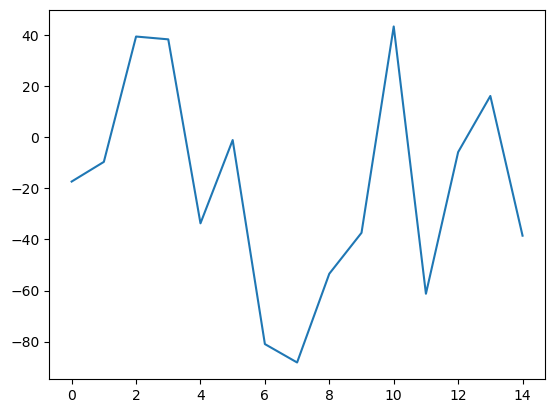

In [62]:
#error
plt.plot(df_res.error)

# Perform the LJung-Box test

In [63]:
pvalue=sm.stats.acorr_ljungbox(r1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue<0.05:
    print('Reject H0. Bad model')
else:
    print('Accept H0. Good model')

Accept H0. Good model


# Calculate MSE and RMSE of the Model from the test.

In [64]:
# MSE
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.pred)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(3,2)
	MSE = 2036.683611366829
	RMSE = 45.129631190237184


# Plot the actual data and predicted data


Text(0.5, 1.0, 'ARMA Model. Order=(3,2)')

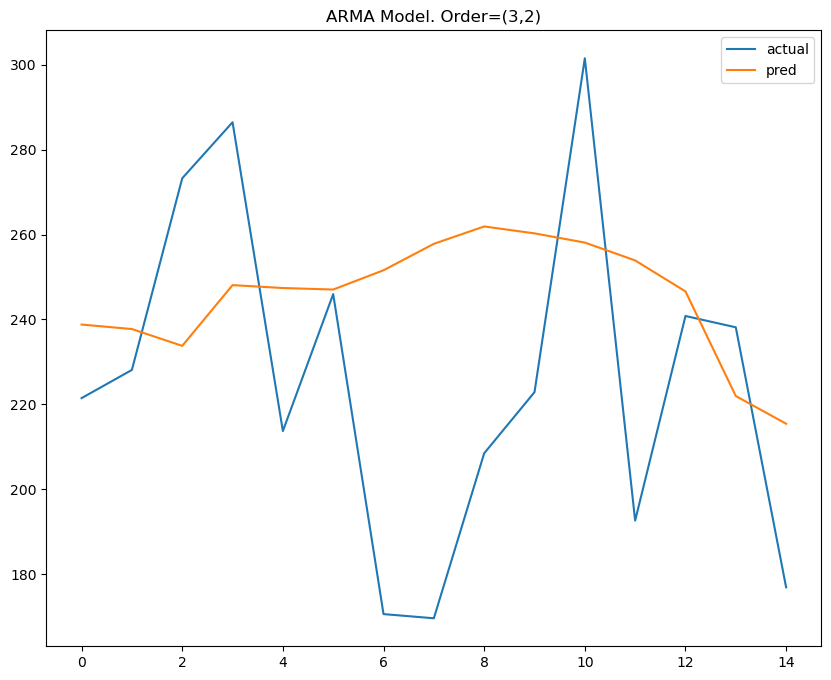

In [66]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.pred.plot(legend=True)
plt.title(msg)